In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle

plt.rcParams['font.family'] = 'serif'
plt.rcParams.update({"text.usetex": True,
                        "text.latex.preamble": r"\usepackage{amsmath}"})
plt.rcParams.update({'pdf.fonttype': 42})

In [2]:
# load data
folder = "exp2_results"
exp_no_circ = "no_circ_2024-08-06-17-57-56_keep"
file = 'data.pickle'
with open(folder + '/' + exp_no_circ + '/' + file, 'rb') as f:
    data_no_circ = pickle.load(f)


In [3]:
print(data_no_circ.keys())

dict_keys(['tau', 'all_h', 'time_per_loop', 'P_EE', 'P_EE_d', 'theta_2d_list'])


[13.9908309  13.99176002 13.99269223 13.99364114 13.99464178 13.9956038
 13.99653745 13.99745631 13.99838877 13.99931908]
[13.99931908 14.07942696 14.15953485 14.23964274 14.31975063 14.39985852
 14.47996641 14.56007429 14.64018218 14.72029007]
[0.0140969  0.01431916 0.01444244 0.01460954 0.01480198 0.01500754
 0.01519145 0.01534966 0.01548672 0.01571911]
[0.01571911 0.01571911 0.01571911 0.01571911 0.01571911 0.01571911
 0.01571911 0.01571911 0.01571911 0.01571911]


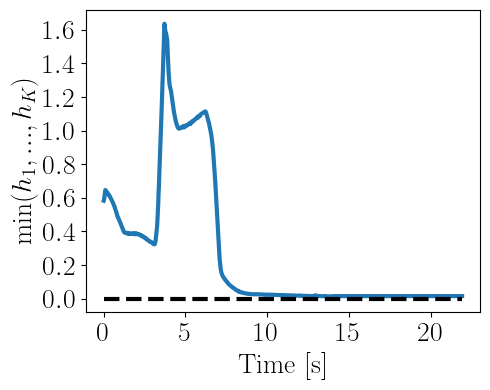

In [11]:
all_h = np.array(data_no_circ['all_h'])
t = np.cumsum(data_no_circ['time_per_loop'])

fig, ax = plt.subplots(figsize=(5,4), frameon=True)
label_fs = 20
tick_fs = 20
legend_fs = 20
linewidth = 3

index = t < 14.0

t_keep = t[index]
min_h_keep = np.min(all_h, axis=1)[index]

# extrapolate till t=21.93
t_extrap = np.linspace(t_keep[-1], 21.93, 100)
min_h_extrap = np.ones_like(t_extrap) * min_h_keep[-1]
t = np.concatenate((t_keep, t_extrap[1:]))
print(t_keep[-10:])
print(t_extrap[:10])
min_h = np.concatenate((min_h_keep, min_h_extrap[1:]))
print(min_h_keep[-10:])
print(min_h_extrap[:10])
plt.plot(t, min_h, linewidth=linewidth)
plt.hlines(0, t[0], t[-1], colors='k', linestyles='dashed', linewidth=linewidth)

# plt.plot(t[index], np.min(all_h, axis=1)[index], linewidth=linewidth)
# plt.hlines(0, t[0], t[index][-1], colors='k', linestyles='dashed', linewidth=linewidth)

plt.xlabel('Time [s]', fontsize=label_fs)
plt.ylabel('$\min(h_1, ..., h_K)$', fontsize=label_fs)
plt.xticks(fontsize = tick_fs)
plt.yticks(fontsize = tick_fs)
plt.tight_layout()
plt.savefig(folder + '/' + exp_no_circ + '/cbf_no_circ.pdf')

In [5]:
print(np.min(all_h[index], axis=1)[-2])

0.015486718651570808


In [4]:
# load data
folder = "exp2_results"
exp_with_circ = "with_circ_2024-08-06-18-01-37_keep"
file = 'data.pickle'
with open(folder + '/' + exp_with_circ + '/' + file, 'rb') as f:
    data_with_circ = pickle.load(f)


In [5]:
print(data_with_circ.keys())

dict_keys(['tau', 'all_h', 'smooth_min', 'time_per_loop', 'P_EE', 'P_EE_d', 'theta_2d_list', 'v_EE'])


21.935784578323364


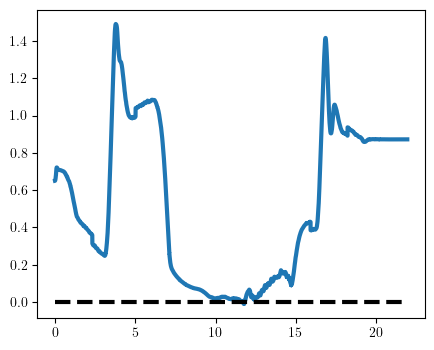

In [6]:
smooth_min = np.array(data_with_circ['smooth_min'])
t = np.cumsum(data_with_circ['time_per_loop'])

fig, ax = plt.subplots(figsize=(5,4), frameon=True)
label_fs = 20
tick_fs = 20
legend_fs = 20
linewidth = 3

plt.plot(t, smooth_min, linewidth=linewidth)
plt.hlines(0, t[0], t[-1], colors='k', linestyles='dashed', linewidth=linewidth)
print(t[-1])

# plt.xlabel('Time [s]', fontsize=label_fs)
# plt.ylabel('$\phi(x)$', fontsize=label_fs)
# plt.xticks(fontsize = tick_fs)
# plt.yticks(fontsize = tick_fs)
# plt.tight_layout()
# plt.savefig(folder + '/' + exp_with_circ + '/cbf_with_circ.pdf')

In [9]:
print(np.min(smooth_min))

-0.010953349488661557


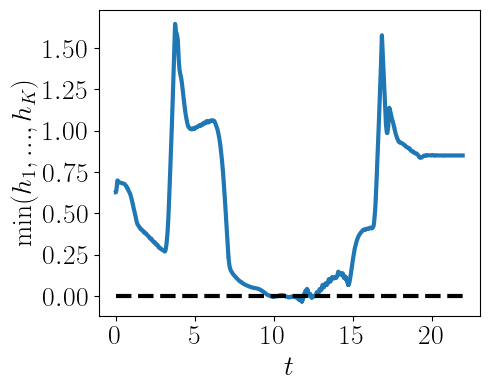

In [10]:
all_h = np.array(data_with_circ['all_h'])
t = np.cumsum(data_with_circ['time_per_loop'])

fig, ax = plt.subplots(figsize=(5,4), frameon=True)
label_fs = 20
tick_fs = 20
legend_fs = 20
linewidth = 3

plt.plot(t, np.min(all_h, axis=1), linewidth=linewidth)
plt.hlines(0, t[0], t[-1], colors='k', linestyles='dashed', linewidth=linewidth)

plt.xlabel('$t$', fontsize=label_fs)
plt.ylabel('$\min(h_1, ..., h_K)$', fontsize=label_fs)
plt.xticks(fontsize = tick_fs)
plt.yticks(fontsize = tick_fs)
plt.tight_layout()

In [4]:
time_per_loop = np.array(data_with_circ['time_per_loop'])
print(np.mean(time_per_loop))
print(np.median(time_per_loop))
print(np.percentile(time_per_loop, 90))

0.0011903508019493903
0.0010104179382324219
0.0018744230270385737
